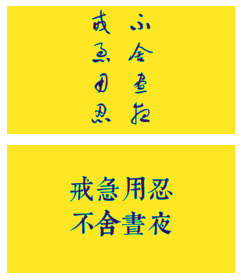

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np

%matplotlib inline

pic1_pre = image.imread('./Pics/1.PNG')
pic2_pre = image.imread('./Pics/3.PNG')

p1 = pic1_pre[:, :, 1]
p2 = pic2_pre[:, :, 1]
fig_orig, (ax1, ax2) = plt.subplots(2,1)
#lum_img = pic1[:, :, 0]
ax1.imshow(p1)
ax2.imshow(p2)
ax1.axis('off')
ax2.axis('off')
plt.tight_layout()
# plt.subplot_tool()
# plt.show()

(1080, 1920) (1080, 1920)
(2, 2073600) (2, 2)


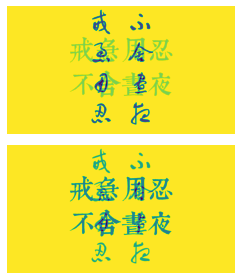

In [2]:
A = np.array([[0.8, 0.2],[1/2, 2/3]])
print(p1.shape,p2.shape)
hight, wide = p1.shape
P = np.stack((p1.ravel(), p2.ravel()))
print(P.shape, A.shape)
X = A.dot(P)
X_plot = X.reshape(2, hight, wide)
fig, (ax_1, ax_2) = plt.subplots(2)
ax_1.imshow(X_plot[0])
ax_2.imshow(X_plot[1])
ax_1.axis('off')
ax_2.axis('off')
plt.tight_layout()

## step 1: rotate out PC direction

$\theta_0 = \frac{1}{2}tg^{-1}\left[\frac{-2\sum x_1 x_2}{\sum(x_1^2-x_2^2)}\right]$

In [3]:
print(X.shape, X.mean(axis=1))
X -= np.tile(np.mean(X, axis=1).reshape(2,1), (1, X.shape[1]))
theta0 = 0.5 * np.arctan(-2*np.sum(X[0]*X[1])/np.sum(X[0]**2-X[1]**2))
Us = np.array([[np.cos(theta0), np.sin(theta0)],[-np.sin(theta0), np.cos(theta0)]])
theta0 * 360/(2*np.pi)

(2, 2073600) [0.65423641 0.75799786]


38.54103224683592

## step 2: undo scaling of singular values

In [4]:
sig1 = np.sum( (X[0]*np.cos(theta0)+X[1]*np.sin(theta0))**2)
sig2 = np.sum( (X[0]*np.cos(theta0-np.pi/2)+X[1]*np.sin(theta0-np.pi/2))**2)
SIG = np.array([[1/np.sqrt(sig1), 0],[0, 1/np.sqrt(sig2)]])

## step 3: make probalility density separable

$\vec X = A \vec S$

$A = U \Sigma V^T$

$\tilde S = V\Sigma U^*X$


$\bar X = \Sigma U^* X$

$\tilde S = V\tilde X \bar X$


In [5]:
X_bar = SIG @ (Us @ X)
X_bar_plot = X_bar.reshape(2, hight, wide)
print(X_bar.shape)

phi0 = 0.25 * np.arctan( -np.sum(2*X_bar[0]**3 * X_bar[1] - 2*X_bar[1]**3 * X_bar[0]) /
                        np.sum(3*X_bar[0]**2 * X_bar[1]**2 - 
                               0.5*X_bar[0]**4 -0.5*X_bar[1]**4)
                       )
V = np.array([[np.cos(phi0), np.sin(phi0)],[-np.sin(phi0), np.cos(phi0)]])

phi0*(180/np.pi)

(2, 2073600)


14.117559593615418

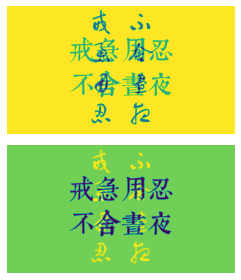

In [6]:
fig_unfold, (ax_f1, ax_f2) = plt.subplots(2)
ax_f1.imshow(X_bar_plot[0])
ax_f2.imshow(X_bar_plot[1])
ax_f1.axis('off')
ax_f2.axis('off')
plt.tight_layout()